<a href="https://colab.research.google.com/github/KarolineCostadaSilva/curso_fotografia_computacional/blob/main/Semana%201/Equalizacao_de_histograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Equalização de histograma de imagem

In [ ]:
import os
if os.path.isdir("imgcourse"):
  print("Diretório já existe!")
else:
  !git clone https://github.com/mhsacampos/imgcourse

Diretório já existe!


##Carregamento da imagem inicial

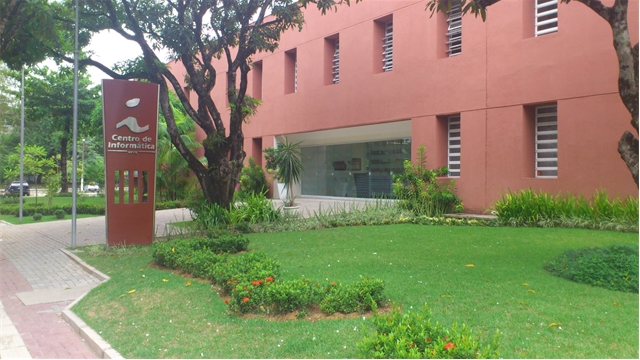

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

im_path = "./imgcourse/Cin.jpg"
img = cv2.imread(im_path)

cv2_imshow(img)

##Definições das funções para histograma e de equalização

In [ ]:
def histogram(image):

    height = image.shape[0]
    width = image.shape[1]
    N = height*width

    histogram = np.zeros(256)

    for i in range(0, height):
        for j in range(0, width):
            pixel = image[i, j]
            histogram[pixel] += 1

    for i in range(0, len(histogram)):
        histogram[i] = (histogram[i] / N)
    return histogram

In [ ]:
def histogramEqualization(histogram, image):

    cdf = np.zeros(256)
    cdf[0] = histogram[0]

    for i in range(1, 256):
        cdf[i] = cdf[i-1] + histogram[i]

    height = image.shape[0]
    width = image.shape[1]

    for i in range(0, height):
        for j in range(0, width):
            intensity = image[i, j]
            newIntensity = cdf[intensity]
            image[i, j] = int(newIntensity*255)

    return image

##Apresentação da imagem anterior, convertida em tons de cinza e cálculo dos valores máximo e mínimo de tons de cinza

Min intensity = 37
Max intensity = 255


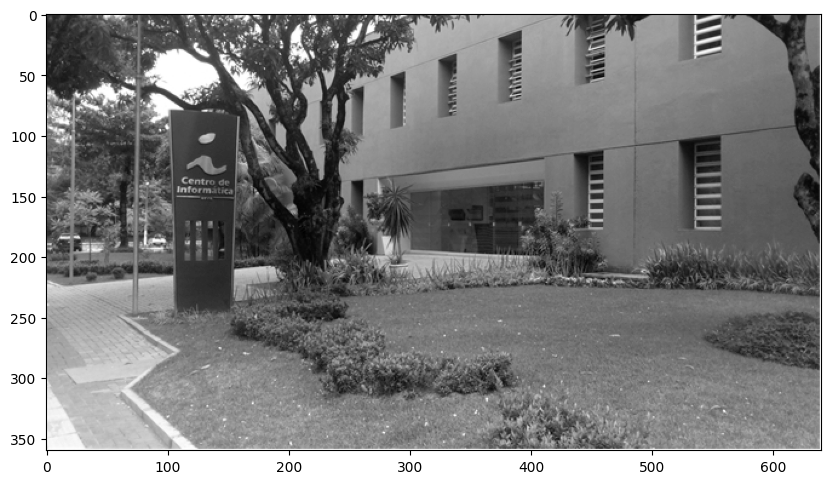

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray

im_path =  "./imgcourse/Cin.jpg"

# Read the image and convert to grayscale
im = io.imread(im_path)
im_uint8 = np.array(rgb2gray(im)*255).astype("uint8")

print("Min intensity = " + str(np.min(im_uint8)))
print("Max intensity = " + str(np.max(im_uint8)))

# Show the original image
fig1 = plt.figure(figsize = (10,10))
plt.gray()
plt.imshow(im_uint8)

##Cálculo do histograma através da função definida anteriormente

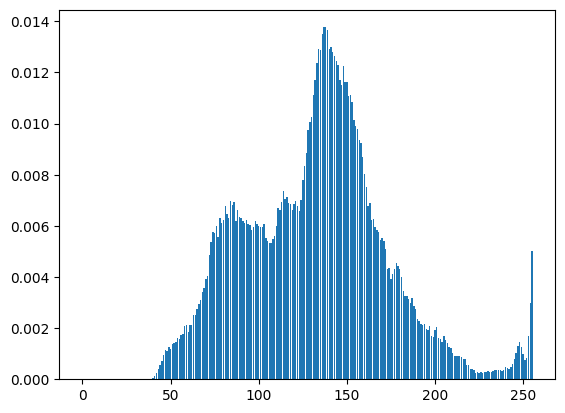

In [ ]:
hist = histogram(im_uint8)
plt.bar(np.arange(len(hist)), hist)
plt.show()

#Obtenção do histograma da imagem original e de uma sub-região com máscara atraves da biblioteca OpenCV

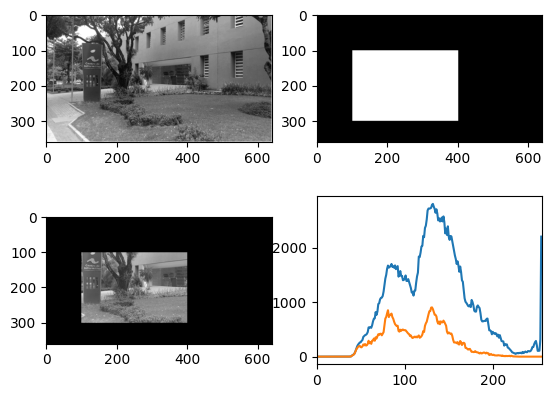

In [ ]:
im_path = "./imgcourse/Cin.jpg"
img = cv2.imread(im_path, cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256]) #Histograma de toda a imagem
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256]) #Histograma da máscara

#Apresentação de resultados
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

##Equalização do histograma através da função definida inicialmente

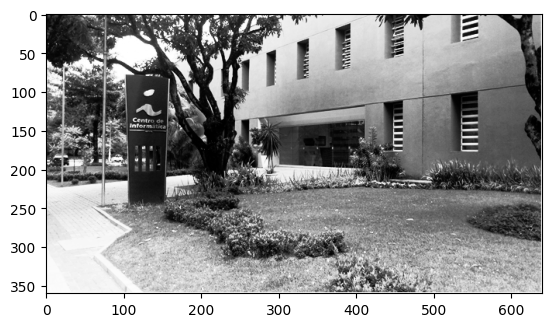

In [ ]:
newImage = histogramEqualization(hist, im_uint8)
plt.imshow(newImage, cmap='gray')

##Equalização do histograma através da biblioteca OpenCV

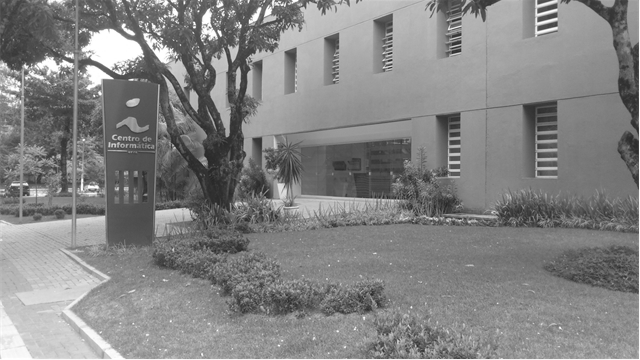

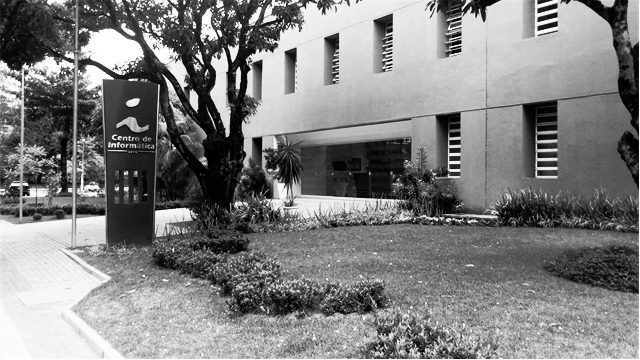

In [ ]:
im_path = "./imgcourse/Cin.jpg"
img = cv2.imread(im_path)
src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = cv2.equalizeHist(src)
cv2_imshow(src)
cv2_imshow(dst)